## 1. 导入

In [2]:
%pip uninstall fsspec -y
%pip install fsspec==2023.6.0
%pip install --upgrade transformers
%pip uninstall -y numpy
%pip install numpy==1.26.4
%pip install transformers datasets evaluate

Found existing installation: fsspec 2023.6.0
Uninstalling fsspec-2023.6.0:
  Successfully uninstalled fsspec-2023.6.0
  Using cached fsspec-2023.6.0-py3-none-any.whl.metadata (6.7 kB)
Using cached fsspec-2023.6.0-py3-none-any.whl (163 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 119.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer
from torch.utils.data import DataLoader
from transformers import AutoModelForSequenceClassification
import evaluate
from transformers import TrainingArguments
from transformers import Trainer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
dataset = load_dataset("glue", "sst2")

print(dataset)
print(dataset["train"][0])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

DatasetDict({
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
})
{'sentence': 'hide new secretions from the parental units ', 'label': 0, 'idx': 0}


In [3]:
for i in range(5):
    print(dataset["train"][i])

{'sentence': 'hide new secretions from the parental units ', 'label': 0, 'idx': 0}
{'sentence': 'contains no wit , only labored gags ', 'label': 0, 'idx': 1}
{'sentence': 'that loves its characters and communicates something rather beautiful about human nature ', 'label': 1, 'idx': 2}
{'sentence': 'remains utterly satisfied to remain the same throughout ', 'label': 0, 'idx': 3}
{'sentence': 'on the worst revenge-of-the-nerds clichés the filmmakers could dredge up ', 'label': 0, 'idx': 4}


## 2. Tokenizer

In [4]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(sentences):
    return tokenizer(sentences["sentence"], padding = "max_length", truncation=True)

tokenizer_datasets = dataset.map(tokenize_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In [5]:
print(tokenizer_datasets["train"][0])

{'sentence': 'hide new secretions from the parental units ', 'label': 0, 'idx': 0, 'input_ids': [101, 5342, 2047, 3595, 8496, 2013, 1996, 18643, 3197, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [6]:
tokenizer_datasets = tokenizer_datasets.remove_columns(["sentence", "idx"])
tokenizer_datasets.set_format("torch")

In [7]:
print(tokenizer_datasets["train"])

Dataset({
    features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 67349
})


## 3. DataLoder

In [8]:
train_dataloader = DataLoader(tokenizer_datasets["train"], batch_size=16,shuffle=True)
eval_dataloader = DataLoader(tokenizer_datasets["validation"], batch_size=16)

## 4. 模型与训练

In [9]:

model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

In [11]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    report_to="none",
)


In [12]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenizer_datasets["train"],
    eval_dataset=tokenizer_datasets["validation"],
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.192500,0.253341,0.911697
2,0.092500,0.328156,0.909404


Epoch,Training Loss,Validation Loss,Accuracy
1,0.192500,0.253341,0.911697
2,0.092500,0.328156,0.909404
3,0.097800,0.331572,0.922018


TrainOutput(global_step=12630, training_loss=0.1465111715399077, metrics={'train_runtime': 7882.1089, 'train_samples_per_second': 25.634, 'train_steps_per_second': 1.602, 'total_flos': 5.316079940232192e+16, 'train_loss': 0.1465111715399077, 'epoch': 3.0})

## 5. 保存与评估

In [13]:
model.save_pretrained("./sentiment_model")
tokenizer.save_pretrained("./sentiment_model")

('./sentiment_model/tokenizer_config.json',
 './sentiment_model/special_tokens_map.json',
 './sentiment_model/vocab.txt',
 './sentiment_model/added_tokens.json',
 './sentiment_model/tokenizer.json')

In [14]:
predictions = trainer.predict(tokenizer_datasets["validation"])
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(axis=1)

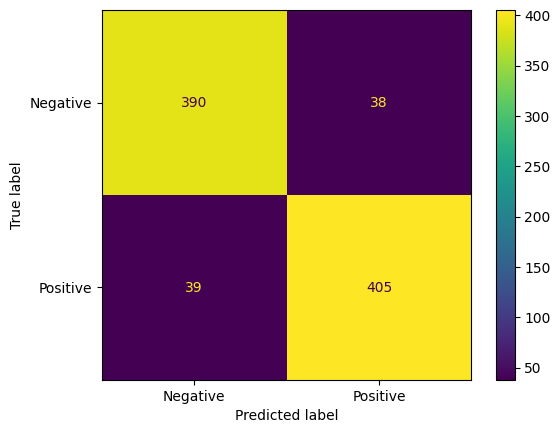

In [15]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()

In [16]:
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91       428
    Positive       0.91      0.91      0.91       444

    accuracy                           0.91       872
   macro avg       0.91      0.91      0.91       872
weighted avg       0.91      0.91      0.91       872



## 6. 微调

In [19]:
raw_datasets = load_dataset("imdb")

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=512)

tokenized_datasets = raw_datasets.map(preprocess, batched=True)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [20]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./bert-finetuned-imdb",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    report_to="none",
)


In [26]:
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)


In [27]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics,
)

trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy
1,0.249200,0.256945,0.921720
2,0.123700,0.268661,0.941560


TrainOutput(global_step=6250, training_loss=0.22218532958984374, metrics={'train_runtime': 2846.1704, 'train_samples_per_second': 17.567, 'train_steps_per_second': 2.196, 'total_flos': 1.3155552768e+16, 'train_loss': 0.22218532958984374, 'epoch': 2.0})

In [28]:
model.save_pretrained("./bert-finetuned-imdb")
tokenizer.save_pretrained("./bert-finetuned-imdb")

('./bert-finetuned-imdb/tokenizer_config.json',
 './bert-finetuned-imdb/special_tokens_map.json',
 './bert-finetuned-imdb/vocab.txt',
 './bert-finetuned-imdb/added_tokens.json',
 './bert-finetuned-imdb/tokenizer.json')

In [31]:
predictions = trainer.predict(tokenizer_datasets["validation"])
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(axis=1)

## 7. 封装与部署

In [ ]:
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("./finetuned_sentiment_model")
tokenizer = AutoTokenizer.from_pretrained("./finetuned_sentiment_model")

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predicted_label = torch.argmax(probs).item()
        confidence = probs[0][predicted_label].item()

    label = "Positive" if predicted_label == 1 else "Negative"
    return f"{label} ({confidence:.2f})"

In [ ]:
import gradio as gr

demo = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter a sentence..."),
    outputs="text",
    title="Sentiment Classifier",
    description="Enter a sentence and get sentiment prediction using BERT."
)

demo.launch(share=True)